<a href="https://colab.research.google.com/github/mukaseevru/ds-school/blob/main/final_project/word_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключение библиотек

In [ ]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Настройки

In [ ]:
# Знаки пунктуации
stoppunct = string.punctuation + '—' + '«' + '»'
# stoppunct

In [ ]:
stopwords = nltk.corpus.stopwords.words('russian')
add_stopwords = (['эта', 'этим', 'этими', 'этих', 'этому', 'ко', 'который', 'которого',
                  'которому', 'которым', 'котором', 'которая', 'которой',
                  'которую', 'такого', 'такому', 'таким', 'таком', 'такая',
                  'такую', 'которые', 'которых', 'которым', 'которыми', 'такие',
                  'таких', 'таким', 'такими', 'всем', 'всеми', 'самого',
                  'самому', 'самим', 'самом', 'сама', 'самой', 'саму', 'сами',
                  'самих', 'самим', 'самими', 'кого', 'кому', 'кем', 'ком',
                  'тому', 'та', 'той', 'ту', 'собой', 'моего', 'моему', 'моим',
                  'моем', 'моей', 'мою', 'оба', 'обе', 'с'])
stopwords.extend(add_stopwords)
stopwords.extend(stoppunct)
stopwords.append('')
# stopwords

In [ ]:
debug = True

# Функции

In [ ]:
def is_number(s):
    '''
    Проверка на число. Возвращает True, если в полученной строке число
    '''
    try:
        float(s)
        return True
    except ValueError:
        return False

In [ ]:
def short_words(text, stoppunct=stoppunct, stopwords=stopwords):
    '''
    Создание списка коротких слов
    '''
    if pd.isnull(text):
        return np.nan
    tokenizer = nltk.WordPunctTokenizer()
    words = [word.lower().strip(stoppunct) for word in tokenizer.tokenize(text)
             if word.lower().strip(stoppunct) not in stopwords]
    # удалить цифры
    words = [word for word in words if not (is_number(word))]
    short_words = []
    stemmer = nltk.stem.SnowballStemmer('russian')
    for word in words:
        short_words.append(stemmer.stem(word))
    return short_words

In [ ]:
def count_words(words, stoppunct=stoppunct, stopwords=stopwords):
    '''
    Создание словаря с количеством слов
    '''
    if type(words) == np.float:
        return np.nan
    words_dict = {}
    for word in words:
        if word not in words_dict:
            words_dict[word] = 1
        else:
            words_dict[word] += 1
    return words_dict

In [ ]:
def list_merge(lstlst, no_duplication=False):
    '''
    Объединение списков
    no_duplication - убирает дубликаты в одной статье. Для подсчета количества статей
    '''
    if type(lstlst) == np.float:
        return np.nan
    all = []
    for lst in lstlst:
        if type(lst) == np.float:
            continue
        if no_duplication:
            all.extend(set(lst))
        else:
            all.extend(lst)
    return all

In [ ]:
union_dict = {}


def sum_dicts(d1, d2=union_dict):
    '''
    Сложение словарей
    '''
    k = set(list(d1.keys()) + list(d2.keys()))
    d = {}
    for i in k:
        v1 = d1.get(i)
        v2 = d2.get(i)
        if v1 == None:
            v = v2
        elif v2 == None:
            v = v1
        else:
            v = v1 + v2
        d[i] = v
    d2.update(d)
    # return d2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/sber/news/data/banki.csv',
                 dtype={'id': np.str,
                        'title': np.str,
                        'text': np.str,
                        'url': np.str,
                        'time': np.str,
                        'views': np.int64,
                        'comments': np.int64,
                        'source': np.str
                        })
df.time = pd.to_datetime(df.time, format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113171 entries, 0 to 113170
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   id        113171 non-null  object        
 1   title     113171 non-null  object        
 2   text      113093 non-null  object        
 3   url       113171 non-null  object        
 4   time      113171 non-null  datetime64[ns]
 5   views     113171 non-null  int64         
 6   comments  113171 non-null  int64         
 7   source    113132 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 6.9+ MB


In [ ]:
df.head()

,id,title,text,url,time,views,comments,source
0,10940845,"Эксперты рассказали, каким образом мошенникам ...",На сегодняшний день телекоммуникационные систе...,https://www.banki.ru/news/lenta/?id=10940845,2021-02-02 09:09:00,4012,0,Известия
1,10940844,Почти половина работников в России заявили о п...,События 2020 года пагубно сказались на мотивац...,https://www.banki.ru/news/lenta/?id=10940844,2021-02-02 08:58:00,2295,3,РБК
2,10940817,Банк « Уралсиб» сообщил о кадровых перестановках,"Станислав Тывес, заместитель председателя прав...",https://www.banki.ru/news/lenta/?id=10940817,2021-02-02 08:54:00,3210,0,Партнёрский материал
3,10940847,Опрос: москвичи не хотят возвращаться в офисы,"Более половины московских сотрудников, перевед...",https://www.banki.ru/news/lenta/?id=10940847,2021-02-02 08:49:00,2224,4,Banki.ru
4,10940843,В России число преступлений с банковскими карт...,В России в 2020 году количество преступлений с...,https://www.banki.ru/news/lenta/?id=10940843,2021-02-02 08:48:00,2387,2,Известия


Создадим столбцы:
1. Будут содержать список слов, из которых состоят заголовки и текст.
2. Будут содержать список словарей со словами и количеством вхождений этих слов в заголовках и текстах.

In [ ]:
df['title_words'] = df.title.apply(
    lambda title: short_words(title, stoppunct, stopwords))
df['text_words'] = df.text.apply(
    lambda text: short_words(text, stoppunct, stopwords))
df['count_title_words'] = df.title_words.apply(
    lambda words: count_words(words, stoppunct, stopwords))
df['count_text_words'] = df.text_words.apply(
    lambda words: count_words(words, stoppunct, stopwords))

In [ ]:
df.head()

,id,title,text,url,time,views,comments,source,title_words,text_words,count_title_words,count_text_words
0,10940845,"Эксперты рассказали, каким образом мошенникам ...",На сегодняшний день телекоммуникационные систе...,https://www.banki.ru/news/lenta/?id=10940845,2021-02-02 09:09:00,4012,0,Известия,"[эксперт, рассказа, как, образ, мошенник, уда,...","[сегодняшн, ден, телекоммуникацион, систем, по...","{'эксперт': 1, 'рассказа': 1, 'как': 1, 'образ...","{'сегодняшн': 1, 'ден': 1, 'телекоммуникацион'..."
1,10940844,Почти половина работников в России заявили о п...,События 2020 года пагубно сказались на мотивац...,https://www.banki.ru/news/lenta/?id=10940844,2021-02-02 08:58:00,2295,3,РБК,"[половин, работник, росс, заяв, паден, мотивац]","[событ, год, пагубн, сказа, мотивац, сотрудник...","{'половин': 1, 'работник': 1, 'росс': 1, 'заяв...","{'событ': 1, 'год': 3, 'пагубн': 1, 'сказа': 4..."
2,10940817,Банк « Уралсиб» сообщил о кадровых перестановках,"Станислав Тывес, заместитель председателя прав...",https://www.banki.ru/news/lenta/?id=10940817,2021-02-02 08:54:00,3210,0,Партнёрский материал,"[банк, уралсиб, сообщ, кадров, перестановк]","[станисла, тывес, заместител, председател, пра...","{'банк': 1, 'уралсиб': 1, 'сообщ': 1, 'кадров'...","{'станисла': 3, 'тывес': 1, 'заместител': 2, '..."
3,10940847,Опрос: москвичи не хотят возвращаться в офисы,"Более половины московских сотрудников, перевед...",https://www.banki.ru/news/lenta/?id=10940847,2021-02-02 08:49:00,2224,4,Banki.ru,"[опрос, москвич, хот, возвраща, офис]","[половин, московск, сотрудник, переведен, дист...","{'опрос': 1, 'москвич': 1, 'хот': 1, 'возвраща...","{'половин': 1, 'московск': 1, 'сотрудник': 3, ..."
4,10940843,В России число преступлений с банковскими карт...,В России в 2020 году количество преступлений с...,https://www.banki.ru/news/lenta/?id=10940843,2021-02-02 08:48:00,2387,2,Известия,"[росс, числ, преступлен, банковск, карт, вырос...","[росс, год, количеств, преступлен, использован...","{'росс': 1, 'числ': 1, 'преступлен': 1, 'банко...","{'росс': 1, 'год': 8, 'количеств': 4, 'преступ..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113171 entries, 0 to 113170
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id                 113171 non-null  object        
 1   title              113171 non-null  object        
 2   text               113093 non-null  object        
 3   url                113171 non-null  object        
 4   time               113171 non-null  datetime64[ns]
 5   views              113171 non-null  int64         
 6   comments           113171 non-null  int64         
 7   source             113132 non-null  object        
 8   title_words        113171 non-null  object        
 9   text_words         113093 non-null  object        
 10  count_title_words  113171 non-null  object        
 11  count_text_words   113093 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 10.4+ MB


In [ ]:
df.to_csv(
    'drive/MyDrive/Colab Notebooks/sber/news/data/news_withwords.csv', index=False)

# Аналитика по дням

## Titles

Сделаем аналитику по заголовкам

In [ ]:
# Слова
titles = {}
for i in range(1, df.time.dt.dayofyear.max()+1):
    titles[i] = pd.Series(count_words(list_merge(df[(df.time.dt.dayofyear == i) &
                                                    (df.time.dt.isocalendar().year == 2020)].title_words)))
titles_daily = pd.concat(titles, axis=1)
columns = titles_daily.columns
titles_daily['sum_yearly'] = titles_daily[columns].sum(axis=1)
titles_daily['mean_yearly'] = titles_daily[columns].mean(axis=1)
titles_daily['median_yearly'] = titles_daily[columns].median(axis=1)
titles_daily[['sum_yearly', 'mean_yearly', 'median_yearly']].head(10)

# Новости
titles = {}
for i in range(1, df.time.dt.dayofyear.max()+1):
    titles[i] = pd.Series(count_words(list_merge(df[(df.time.dt.dayofyear == i) &
                                                    (df.time.dt.isocalendar().year == 2020)].title_words, no_duplication=True)))
titles_daily_n = pd.concat(titles, axis=1)
columns = titles_daily_n.columns
titles_daily_n['sum_yearly'] = titles_daily_n[columns].sum(axis=1)
titles_daily_n['mean_yearly'] = titles_daily_n[columns].mean(axis=1)
titles_daily_n['median_yearly'] = titles_daily_n[columns].median(axis=1)
titles_daily_n[['sum_yearly', 'mean_yearly', 'median_yearly']].head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dt

,sum_yearly,mean_yearly,median_yearly
исследован,212.0,1.394737,1.0
закредитова,3.0,1.000000,1.0
лет,171.0,1.346457,1.0
заемщик,100.0,1.204819,1.0
россиян,249.0,1.596154,1.0
явля,8.0,1.000000,1.0
сам,92.0,1.260274,1.0
валютн,358.0,1.529915,1.0
основн,302.0,1.342222,1.0
заверш,321.0,1.793296,2.0


In [ ]:
titles_daily.sort_index(inplace=True)
titles_daily_n.sort_index(inplace=True)

In [ ]:
titles_daily.to_csv(
    'drive/MyDrive/Colab Notebooks/sber/news/data/titles_daily.csv')
titles_daily_n.to_csv(
    'drive/MyDrive/Colab Notebooks/sber/news/data/titles_daily_n.csv')

## Texts

Сделаем аналитику по текстам

In [ ]:
# Слова
texts = {}
for i in range(1, df.time.dt.dayofyear.max()+1):
    texts[i] = pd.Series(count_words(list_merge(df[(df.time.dt.dayofyear == i) &
                                                   (df.time.dt.isocalendar().year == 2020)].text_words)))
texts_daily = pd.concat(texts, axis=1)
columns = texts_daily.columns
texts_daily['sum'] = texts_daily[columns].sum(axis=1)
texts_daily['mean'] = texts_daily[columns].mean(axis=1)
texts_daily['median'] = texts_daily[columns].median(axis=1)
texts_daily[['sum', 'mean', 'median']].head(10)

# Новости
texts = {}
for i in range(1, df.time.dt.dayofyear.max()+1):
    texts[i] = pd.Series(count_words(list_merge(df[(df.time.dt.dayofyear == i) &
                                                   (df.time.dt.isocalendar().year == 2020)].text_words, no_duplication=True)))
texts_daily_n = pd.concat(texts, axis=1)
columns = texts_daily_n.columns
texts_daily_n['sum'] = texts_daily_n[columns].sum(axis=1)
texts_daily_n['mean'] = texts_daily_n[columns].mean(axis=1)
texts_daily_n['median'] = texts_daily_n[columns].median(axis=1)
texts_daily_n[['sum', 'mean', 'median']].head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dt

,sum,mean,median
динамик,1717.0,5.433544,6.0
поколен,110.0,1.222222,1.0
конец,402.0,1.942029,2.0
числ,3742.0,11.237237,12.0
конц,2543.0,7.729483,8.0
росс,7714.0,22.555556,26.0
вырос,981.0,3.606618,3.0
дисциплинирова,10.0,1.000000,1.0
прайм,60.0,1.111111,1.0
средств,3971.0,11.713864,13.0


In [ ]:
texts_daily.sort_index(inplace=True)
texts_daily_n.sort_index(inplace=True)

In [ ]:
texts_daily.to_csv(
    'drive/MyDrive/Colab Notebooks/sber/news/data/texts_daily.csv')
texts_daily_n.to_csv(
    'drive/MyDrive/Colab Notebooks/sber/news/data/texts_daily_n.csv')

# Аналитика по неделям

## Titles

### Fullweek

Аналитика по заголовкам. Объединяем по полным неделям.

In [ ]:
# Слова
titles = {}
for i in range(1, df.time.dt.isocalendar().week.max()+1):
    titles[i] = pd.Series(count_words(list_merge(df[(df.time.dt.isocalendar().week == i) &
                                                    (df.time.dt.isocalendar().year == 2020)].title_words)))
titles_weekly = pd.concat(titles, axis=1)
columns = titles_weekly.columns
titles_weekly['sum_weekly'] = titles_weekly[columns].sum(axis=1)
titles_weekly['mean_weekly'] = titles_weekly[columns].mean(axis=1)
titles_weekly['median_weekly'] = titles_weekly[columns].median(axis=1)
titles_weekly[['sum_weekly', 'mean_weekly', 'median_weekly']].head(10)

# Новости
titles = {}
for i in range(1, df.time.dt.isocalendar().week.max()+1):
    titles[i] = pd.Series(count_words(list_merge(df[(df.time.dt.isocalendar().week == i) &
                                                    (df.time.dt.isocalendar().year == 2020)].title_words, no_duplication=True)))
titles_weekly_n = pd.concat(titles, axis=1)
columns = titles_weekly_n.columns
titles_weekly_n['sum_weekly'] = titles_weekly_n[columns].sum(axis=1)
titles_weekly_n['mean_weekly'] = titles_weekly_n[columns].mean(axis=1)
titles_weekly_n['median_weekly'] = titles_weekly_n[columns].median(axis=1)
titles_weekly_n[['sum_weekly', 'mean_weekly', 'median_weekly']].head(10)

,sum_weekly,mean_weekly,median_weekly
повышен,145.0,2.959184,2.0
банк,3071.0,57.943396,57.0
стандарт,69.0,1.971429,2.0
русск,59.0,1.735294,1.5
предлож,464.0,8.754717,8.0
карт,488.0,9.207547,9.0
нов,682.0,12.867925,13.0
категор,23.0,1.277778,1.0
держател,40.0,1.428571,1.0
кешбэк,85.0,2.073171,1.0


### Workdays

 Аналитика по заголовкам. Объединяем по рабочим дням недели.

In [ ]:
# Слова
titles = {}
for i in range(1, df.time.dt.isocalendar().week.max()+1):
    titles[i] = pd.Series(count_words(list_merge(df[(df.time.dt.isocalendar().week == i) &
                                                    (df.time.dt.isocalendar().day >= 1) &
                                                    (df.time.dt.isocalendar().day <= 5) &
                                                    (df.time.dt.isocalendar().year == 2020)].title_words)))
titles_weekly_workdays = pd.concat(titles, axis=1)
columns = titles_weekly_workdays.columns
titles_weekly_workdays['sum_weekly_workdays'] = titles_weekly_workdays[columns].sum(
    axis=1)
titles_weekly_workdays['mean_weekly_workdays'] = titles_weekly_workdays[columns].mean(
    axis=1)
titles_weekly_workdays['median_weekly_workdays'] = titles_weekly_workdays[columns].median(
    axis=1)
titles_weekly_workdays[['sum_weekly_workdays',
                        'mean_weekly_workdays', 'median_weekly_workdays']].head(10)

# Новости
titles = {}
for i in range(1, df.time.dt.isocalendar().week.max()+1):
    titles[i] = pd.Series(count_words(list_merge(df[(df.time.dt.isocalendar().week == i) &
                                                    (df.time.dt.isocalendar().day >= 1) &
                                                    (df.time.dt.isocalendar().day <= 5) &
                                                    (df.time.dt.isocalendar().year == 2020)].title_words, no_duplication=True)))
titles_weekly_workdays_n = pd.concat(titles, axis=1)
columns = titles_weekly_workdays_n.columns
titles_weekly_workdays_n['sum_weekly_workdays'] = titles_weekly_workdays_n[columns].sum(
    axis=1)
titles_weekly_workdays_n['mean_weekly_workdays'] = titles_weekly_workdays_n[columns].mean(
    axis=1)
titles_weekly_workdays_n['median_weekly_workdays'] = titles_weekly_workdays_n[columns].median(
    axis=1)
titles_weekly_workdays_n[['sum_weekly_workdays',
                          'mean_weekly_workdays', 'median_weekly_workdays']].head(10)

,sum_weekly_workdays,mean_weekly_workdays,median_weekly_workdays
повышен,138.0,2.816327,2.0
банк,2814.0,53.094340,52.0
стандарт,61.0,1.848485,2.0
русск,52.0,1.625000,1.0
предлож,453.0,8.547170,8.0
карт,386.0,7.283019,7.0
нов,623.0,11.754717,12.0
категор,20.0,1.250000,1.0
держател,31.0,1.240000,1.0
кешбэк,70.0,1.944444,1.5


### Weekend

Аналитика по заголовкам. Объединяем по выходным дням недели.

In [ ]:
# Слова
titles = {}
for i in range(1, df.time.dt.isocalendar().week.max()+1):
    titles[i] = pd.Series(count_words(list_merge(df[(df.time.dt.isocalendar().week == i) &
                                                    (df.time.dt.isocalendar().day >= 6) &
                                                    (df.time.dt.isocalendar().day <= 7) &
                                                    (df.time.dt.isocalendar().year == 2020)].title_words)))
titles_weekly_weekend = pd.concat(titles, axis=1)
columns = titles_weekly_weekend.columns
titles_weekly_weekend['sum_weekly_weekend'] = titles_weekly_weekend[columns].sum(
    axis=1)
titles_weekly_weekend['mean_weekly_weekend'] = titles_weekly_weekend[columns].mean(
    axis=1)
titles_weekly_weekend['median_weekly_weekend'] = titles_weekly_weekend[columns].median(
    axis=1)
titles_weekly_weekend[['sum_weekly_weekend',
                       'mean_weekly_weekend', 'median_weekly_weekend']].head(10)

# Новости
titles = {}
for i in range(1, df.time.dt.isocalendar().week.max()+1):
    titles[i] = pd.Series(count_words(list_merge(df[(df.time.dt.isocalendar().week == i) &
                                                    (df.time.dt.isocalendar().day >= 6) &
                                                    (df.time.dt.isocalendar().day <= 7) &
                                                    (df.time.dt.isocalendar().year == 2020)].title_words, no_duplication=True)))
titles_weekly_weekend_n = pd.concat(titles, axis=1)
columns = titles_weekly_weekend_n.columns
titles_weekly_weekend_n['sum_weekly_weekend'] = titles_weekly_weekend_n[columns].sum(
    axis=1)
titles_weekly_weekend_n['mean_weekly_weekend'] = titles_weekly_weekend_n[columns].mean(
    axis=1)
titles_weekly_weekend_n['median_weekly_weekend'] = titles_weekly_weekend_n[columns].median(
    axis=1)
titles_weekly_weekend_n[['sum_weekly_weekend',
                         'mean_weekly_weekend', 'median_weekly_weekend']].head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

,sum_weekly_weekend,mean_weekly_weekend,median_weekly_weekend
миров,46.0,1.179487,1.0
торг,36.0,1.000000,1.0
нефт,53.0,1.358974,1.0
сниз,36.0,1.333333,1.0
пятниц,38.0,1.000000,1.0
итог,36.0,1.028571,1.0
цен,51.0,1.275000,1.0
расплат,2.0,1.000000,1.0
как,3.0,1.000000,1.0
долг,11.0,1.222222,1.0


In [ ]:
titles_words = pd.concat([titles_daily, titles_weekly,
                          titles_weekly_weekend, titles_weekly_workdays], axis=1).fillna(0)
titles_words_n = pd.concat([titles_daily_n, titles_weekly_n,
                            titles_weekly_weekend_n, titles_weekly_workdays_n], axis=1).fillna(0)

In [ ]:
titles_words.to_csv(
    'drive/MyDrive/Colab Notebooks/sber/news/data/titles_words.csv')
titles_words_n.to_csv(
    'drive/MyDrive/Colab Notebooks/sber/news/data/titles_words_n.csv')

## Texts

### Fullweek

Аналитика по текстам. Объединяем по полным неделям.

In [ ]:
# Слова
texts = {}
for i in range(1, df.time.dt.isocalendar().week.max()+1):
    texts[i] = pd.Series(count_words(list_merge(df[(df.time.dt.isocalendar().week == i) &
                                                   (df.time.dt.isocalendar().year == 2020)].text_words)))
texts_weekly = pd.concat(texts, axis=1)
columns = texts_weekly.columns
texts_weekly['sum_weekly'] = texts_weekly[columns].sum(axis=1)
texts_weekly['mean_weekly'] = texts_weekly[columns].mean(axis=1)
texts_weekly['median_weekly'] = texts_weekly[columns].median(axis=1)
texts_weekly[['sum_weekly', 'mean_weekly', 'median_weekly']].head(10)

# Новости
texts = {}
for i in range(1, df.time.dt.isocalendar().week.max()+1):
    texts[i] = pd.Series(count_words(list_merge(df[(df.time.dt.isocalendar().week == i) &
                                                   (df.time.dt.isocalendar().year == 2020)].text_words, no_duplication=True)))
texts_weekly_n = pd.concat(texts, axis=1)
columns = texts_weekly_n.columns
texts_weekly_n['sum_weekly'] = texts_weekly_n[columns].sum(axis=1)
texts_weekly_n['mean_weekly'] = texts_weekly_n[columns].mean(axis=1)
texts_weekly_n['median_weekly'] = texts_weekly_n[columns].median(axis=1)
texts_weekly_n[['sum_weekly', 'mean_weekly', 'median_weekly']].head(10)

,sum_weekly,mean_weekly,median_weekly
бонус,215.0,4.056604,4.0
повышен,1776.0,33.509434,33.0
зачисля,66.0,1.783784,1.0
cashback,18.0,1.500000,1.0
карт,1761.0,33.226415,33.0
каф,131.0,2.787234,2.0
фастфуд,28.0,1.272727,1.0
программ,2231.0,42.094340,43.0
откр,666.0,12.566038,12.0
традицион,358.0,6.754717,6.0


### Workdays

 Аналитика по текстам. Объединяем по рабочим дням недели.

In [ ]:
# Слова
texts = {}
for i in range(1, df.time.dt.isocalendar().week.max()+1):
    texts[i] = pd.Series(count_words(list_merge(df[(df.time.dt.isocalendar().week == i) &
                                                   (df.time.dt.isocalendar().day >= 1) &
                                                   (df.time.dt.isocalendar().day <= 5) &
                                                   (df.time.dt.isocalendar().year == 2020)].text_words)))
texts_weekly_workdays = pd.concat(texts, axis=1)
columns = texts_weekly_workdays.columns
texts_weekly_workdays['sum_weekly_workdays'] = texts_weekly_workdays[columns].sum(
    axis=1)
texts_weekly_workdays['mean_weekly_workdays'] = texts_weekly_workdays[columns].mean(
    axis=1)
texts_weekly_workdays['median_weekly_workdays'] = texts_weekly_workdays[columns].median(
    axis=1)
texts_weekly_workdays[['sum_weekly_workdays',
                       'mean_weekly_workdays', 'median_weekly_workdays']].head(10)

# Новости
texts = {}
for i in range(1, df.time.dt.isocalendar().week.max()+1):
    texts[i] = pd.Series(count_words(list_merge(df[(df.time.dt.isocalendar().week == i) &
                                                   (df.time.dt.isocalendar().day >= 1) &
                                                   (df.time.dt.isocalendar().day <= 5) &
                                                   (df.time.dt.isocalendar().year == 2020)].text_words, no_duplication=True)))
texts_weekly_workdays_n = pd.concat(texts, axis=1)
columns = texts_weekly_workdays_n.columns
texts_weekly_workdays_n['sum_weekly_workdays'] = texts_weekly_workdays_n[columns].sum(
    axis=1)
texts_weekly_workdays_n['mean_weekly_workdays'] = texts_weekly_workdays_n[columns].mean(
    axis=1)
texts_weekly_workdays_n['median_weekly_workdays'] = texts_weekly_workdays_n[columns].median(
    axis=1)
texts_weekly_workdays_n[['sum_weekly_workdays',
                         'mean_weekly_workdays', 'median_weekly_workdays']].head(10)

,sum_weekly_workdays,mean_weekly_workdays,median_weekly_workdays
бонус,171.0,3.288462,3.0
повышен,1656.0,31.245283,31.0
зачисля,57.0,1.676471,1.0
cashback,8.0,1.142857,1.0
карт,1466.0,27.660377,27.0
каф,107.0,2.326087,2.0
фастфуд,17.0,1.062500,1.0
программ,2004.0,37.811321,38.0
откр,580.0,10.943396,11.0
традицион,330.0,6.226415,6.0


### Weekend

Аналитика по текстам. Объединяем по выходным дням недели.

In [ ]:
# Слова
texts = {}
for i in range(1, df.time.dt.isocalendar().week.max()+1):
    texts[i] = pd.Series(count_words(list_merge(df[(df.time.dt.isocalendar().week == i) &
                                                   (df.time.dt.isocalendar().day >= 6) &
                                                   (df.time.dt.isocalendar().day <= 7) &
                                                   (df.time.dt.isocalendar().year == 2020)].text_words)))
texts_weekly_weekend = pd.concat(texts, axis=1)
columns = texts_weekly_weekend.columns
texts_weekly_weekend['sum_weekly_weekend'] = texts_weekly_weekend[columns].sum(
    axis=1)
texts_weekly_weekend['mean_weekly_weekend'] = texts_weekly_weekend[columns].mean(
    axis=1)
texts_weekly_weekend['median_weekly_weekend'] = texts_weekly_weekend[columns].median(
    axis=1)
texts_weekly_weekend[['sum_weekly_weekend',
                      'mean_weekly_weekend', 'median_weekly_weekend']].head(10)

# Новости
texts = {}
for i in range(1, df.time.dt.isocalendar().week.max()+1):
    texts[i] = pd.Series(count_words(list_merge(df[(df.time.dt.isocalendar().week == i) &
                                                   (df.time.dt.isocalendar().day >= 6) &
                                                   (df.time.dt.isocalendar().day <= 7) &
                                                   (df.time.dt.isocalendar().year == 2020)].text_words, no_duplication=True)))
texts_weekly_weekend_n = pd.concat(texts, axis=1)
columns = texts_weekly_weekend_n.columns
texts_weekly_weekend_n['sum_weekly_weekend'] = texts_weekly_weekend_n[columns].sum(
    axis=1)
texts_weekly_weekend_n['mean_weekly_weekend'] = texts_weekly_weekend_n[columns].mean(
    axis=1)
texts_weekly_weekend_n['median_weekly_weekend'] = texts_weekly_weekend_n[columns].median(
    axis=1)
texts_weekly_weekend_n[['sum_weekly_weekend',
                        'mean_weekly_weekend', 'median_weekly_weekend']].head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a

,sum_weekly_weekend,mean_weekly_weekend,median_weekly_weekend
динамик,81.0,1.928571,2.0
техасск,39.0,1.000000,1.0
европ,52.0,1.333333,1.0
сделок,52.0,1.238095,1.0
нефт,96.0,2.133333,2.0
февральск,7.0,1.000000,1.0
уменьш,62.0,1.722222,1.0
состав,247.0,4.940000,5.0
межконтинентальн,38.0,1.000000,1.0
доллар,172.0,3.440000,3.0


In [ ]:
texts_words = pd.concat([texts_daily, texts_weekly,
                         texts_weekly_weekend, texts_weekly_workdays], axis=1).fillna(0)
texts_words_n = pd.concat([texts_daily_n, texts_weekly_n,
                           texts_weekly_weekend_n, texts_weekly_workdays_n], axis=1).fillna(0)

In [ ]:
import gc
gc.collect()

12

Сохраним аналитику в отдельные файлы.

In [ ]:
texts_words.to_csv(
    'drive/MyDrive/Colab Notebooks/sber/news/data/texts_words.csv')
texts_words_n.to_csv(
    'drive/MyDrive/Colab Notebooks/sber/news/data/texts_words_n.csv')

# Визуализация

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

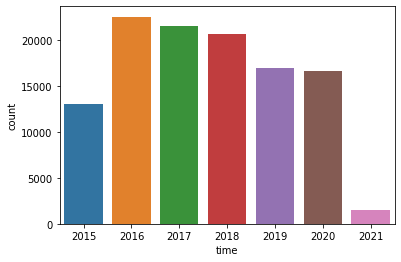

In [ ]:
ax = sns.countplot(x=df.time.sort_values().dt.strftime('%Y'), data=df)
ax.set_title('Количество новостей по годам')
ax.set_ylabel('Количество новостей')
ax.set_xlabel('Годы')

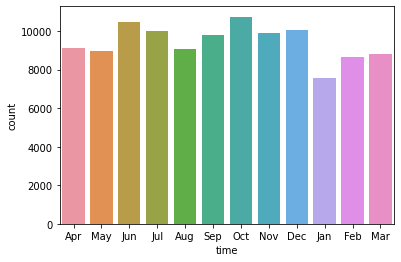

In [ ]:
ax = sns.countplot(x=df.time.sort_values().dt.strftime('%b'), data=df)
ax.set_title('Количество новостей по месяцам')
ax.set_ylabel('Количество новостей')
ax.set_xlabel('Месяцы')

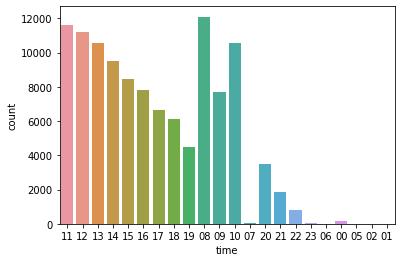

In [ ]:
ax = sns.countplot(x=df.time.sort_values().dt.strftime('%H'), data=df)
ax.set_title('Количество новостей по часам')
ax.set_ylabel('Количество новостей')
ax.set_xlabel('Часы')

[Text(0, 0, 'Thursday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Monday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

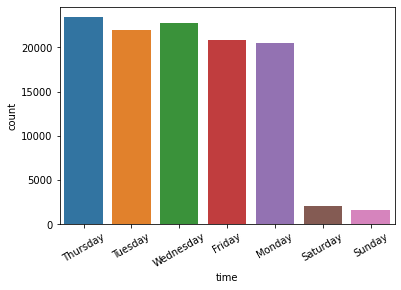

In [ ]:
ax = sns.countplot(x=df.time.sort_values().dt.strftime('%A'), data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
ax.set_title('Количество новостей по дням недели')
ax.set_ylabel('Количество новостей')
ax.set_xlabel('Дни недели')

[Text(0, 0, 'Известия'),
 Text(0, 0, 'РБК'),
 Text(0, 0, 'Banki.ru'),
 Text(0, 0, 'ТАСС'),
 Text(0, 0, 'РАПСИ'),
 Text(0, 0, 'Прайм'),
 Text(0, 0, 'РИА Новости'),
 Text(0, 0, 'Коммерсант'),
 Text(0, 0, 'Ведомости'),
 Text(0, 0, 'RNS')]

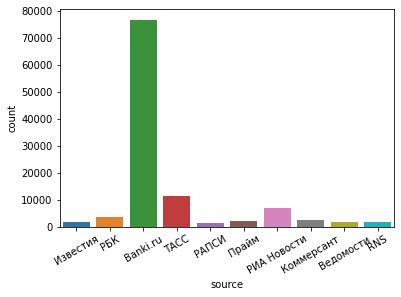

In [ ]:
# Топ-10 ресурсов
ax = sns.countplot(
    x=df[df.source.isin(df.source.value_counts()[:10].index)].source, data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_title('Количество новостей по используемым ресурсам')
ax.set_ylabel('Количество новостей')
ax.set_xlabel('Ресурсы')

# LSA

In [ ]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


def load_data(path, file_name):
    '''
    Функция загрузки данных
    '''
    documents_list = []
    titles = []
    with open(os.path.join(path, file_name), "r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:", len(documents_list))
    titles.append(text[0:min(len(text), 100)])
    return documents_list, titles


def preprocess_data(doc_set):
    '''
    Функция предобработки текста
    '''
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    # en_stop = set(stopwords.words('english'))
    en_stop = set(stopwords)
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts


def prepare_corpus(doc_clean):
    '''
    Функция создания корпуса текста
    '''
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary, doc_term_matrix


def create_gensim_lsa_model(doc_clean, number_of_topics, words):
    '''
    Создание LSA модели
    '''
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(
        doc_term_matrix, num_topics=number_of_topics, id2word=dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel


def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    '''
    Вычисление значения coherence_values
    '''
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics,
                         id2word=dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(
            model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


def plot_graph(doc_clean, start, stop, step):
    '''
    Функция построения графика
    '''
    dictionary, doc_term_matrix = prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix, doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.title('График coherence score')
    plt.xlabel('Количество новостей')
    plt.ylabel('Coherence score')
    plt.legend(('coherence_values'), loc='best')
    plt.show()


number_of_topics = 10
words = 5
clean_text = preprocess_data(df.title.to_list())
model = create_gensim_lsa_model(clean_text, number_of_topics, words)

[(0, '0.691*"банк" + 0.401*"ставки" + 0.261*"рублей" + 0.252*"вкладам" + 0.209*"млрд"'), (1, '0.469*"рублей" + 0.367*"млрд" + -0.312*"банк" + 0.304*"доллара" + 0.295*"курс"'), (2, '-0.423*"доллара" + 0.401*"рублей" + -0.400*"курс" + 0.357*"млрд" + -0.289*"евро"'), (3, '0.500*"цб" + 0.413*"торги" + 0.386*"рф" + 0.271*"фондовые" + 0.238*"россии"'), (4, '-0.533*"банк" + 0.513*"ставки" + 0.412*"цб" + 0.356*"вкладам" + 0.175*"рублях"'), (5, '0.669*"цб" + -0.370*"торги" + -0.256*"рф" + -0.239*"фондовые" + -0.183*"ставки"'), (6, '0.417*"евро" + 0.315*"итогам" + 0.294*"торгов" + -0.258*"30" + -0.255*"11"'), (7, '0.782*"россии" + 0.233*"году" + 0.170*"1" + -0.160*"цб" + -0.148*"рублей"'), (8, '-0.357*"евро" + 0.356*"нефть" + 0.337*"цены" + 0.325*"торгов" + 0.317*"мировые"'), (9, '-0.743*"банка" + 0.267*"рф" + -0.239*"россии" + 0.237*"млрд" + -0.206*"млн"')]


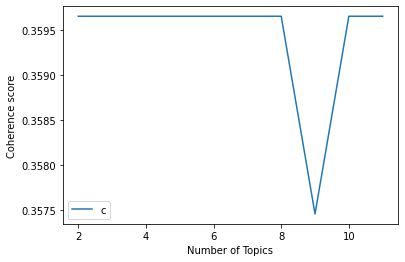

In [ ]:
start, stop, step = 2, 12, 1
plot_graph(clean_text, start, stop, step)